In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
results_by_year = {year : pd.read_csv('data/marathon_results_{}.csv'.format(year)) for year in range(2009,2020)}

In [3]:
results_by_year[2019]

,Bib,Name,Age,M/F,City,State,Country,5K,10K,15K,...,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division
0,2,"Cherono, Lawrence",30,M,Eldoret,NaN,KEN,0:15:11,0:30:21,0:45:48,...,1:04:29,1:16:23,1:32:01,1:47:16,2:01:45,0:04:53,2:07:57,1,1,1
1,6,"Desisa, Lelisa",29,M,Ambo,NaN,ETH,0:15:10,0:30:22,0:45:46,...,1:04:30,1:16:24,1:32:01,1:47:16,2:01:46,0:04:53,2:07:59,2,2,2
2,7,"Kipkemoi, Kenneth",34,M,Eldoret,NaN,KEN,0:15:14,0:30:22,0:45:47,...,1:04:31,1:16:24,1:32:01,1:47:16,2:01:45,0:04:54,2:08:07,3,3,3
3,8,"Kandie, Felix",32,M,Iten,NaN,KEN,0:15:14,0:30:24,0:45:47,...,1:04:31,1:16:24,1:32:01,1:47:16,2:02:08,0:04:55,2:08:54,4,4,4
4,11,"Kirui, Geoffrey",26,M,Keringet,NaN,KEN,0:15:12,0:30:21,0:45:46,...,1:04:28,1:16:23,1:32:01,1:47:16,2:01:57,0:04:56,2:08:55,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26651,23909,"Mcninch, Brett",42,M,New Lebanon,OH,USA,0:27:04,0:55:14,1:30:44,...,2:17:35,3:07:53,4:29:32,5:48:38,6:49:34,0:16:34,7:14:12,26653,14672,1989
26652,23949,"Oconell, Justin",28,M,Franklin,MA,USA,0:50:12,1:37:16,2:26:49,...,3:27:50,4:09:24,5:00:59,5:55:16,-,0:16:39,7:16:19,26654,14673,5092
26653,15946,"Young, John",53,M,Salem,MA,USA,0:39:21,1:24:43,2:12:26,...,3:21:04,4:06:20,5:03:30,6:01:14,-,0:16:42,7:17:35,26655,14674,1858
26654,23937,"Smith, Denise",51,F,Fort Collins,CO,USA,0:39:09,1:22:06,2:11:38,...,3:20:47,4:06:00,5:04:48,6:06:03,-,0:17:01,7:25:39,26656,11982,1200


In [97]:
def prepare_basic_line_chart(data, title, xlabel, ylabel):
    fig, ax = plt.subplots()
    fig.set_size_inches(12,8)
    fig.tight_layout(pad=4)
    fig.suptitle(title, fontsize=17)
    ax.plot(list(data.keys()), list(data.values()), linestyle='--', marker='o', color='b')
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    ax.set_xticks(list(data.keys()))
    ax.set_xticklabels(list(data.keys()))
    plt.grid(linestyle='--')
    return fig, ax

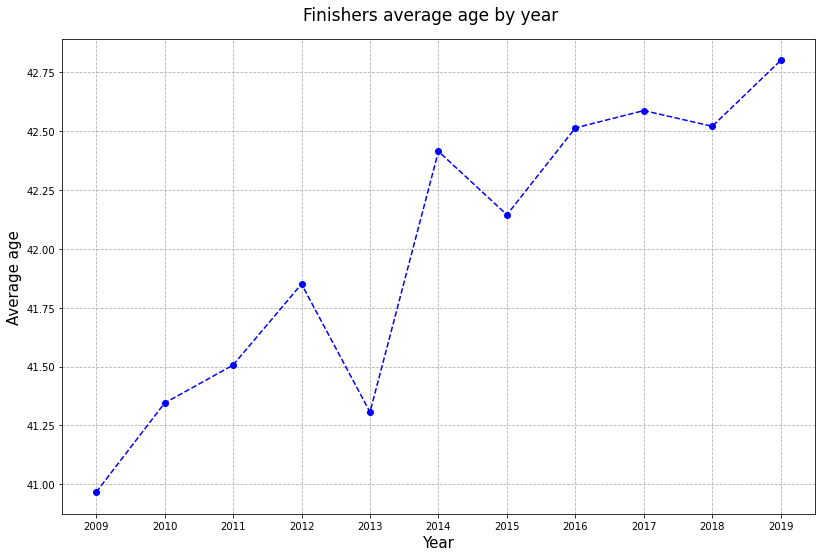

In [98]:
mean_ages = {year : results['Age'].mean() for year, results in results_by_year.items()}
prepare_basic_line_chart(mean_ages, 'Finishers average age by year', 'Year', 'Average age')
plt.show()

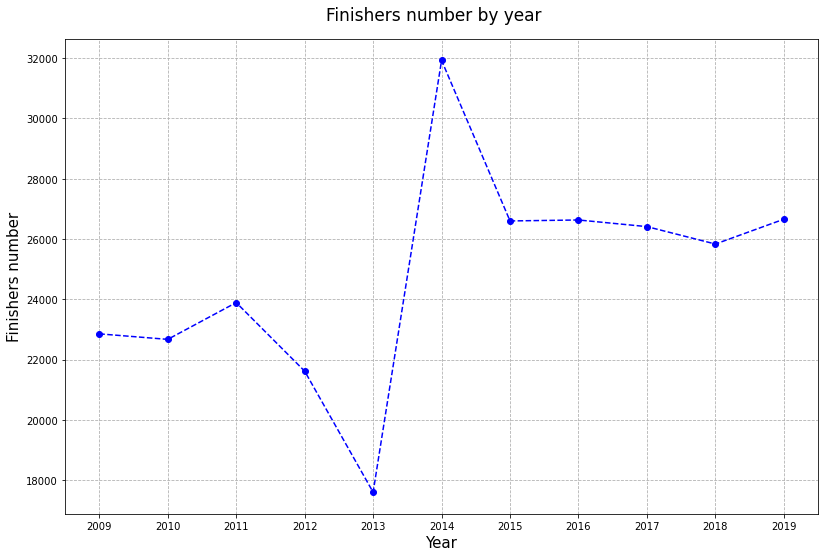

In [99]:
participants_number = {year : len(results) for year, results in results_by_year.items()}
prepare_basic_line_chart(participants_number, 'Finishers number by year', 'Year', 'Finishers number')
plt.show()

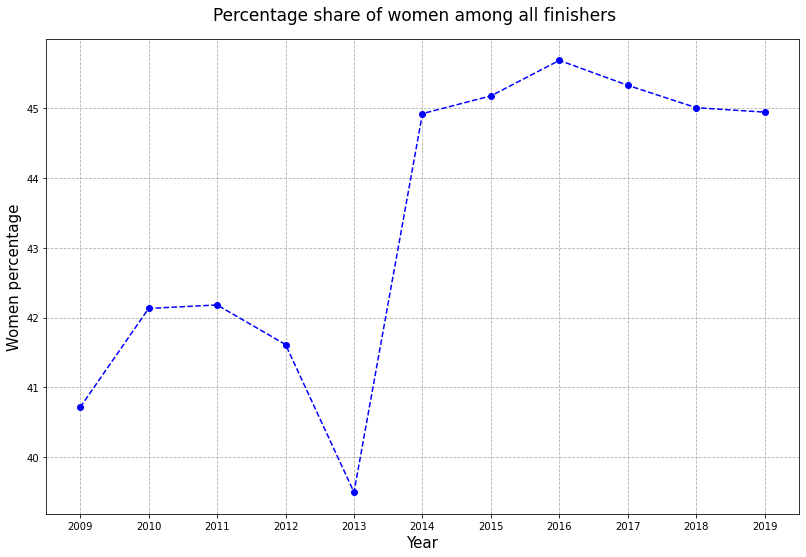

In [100]:
women_number = {year : len(results[results['M/F']=='F']) for year, results in results_by_year.items()}
women_percentage = {year : women/participants*100 for (year, women), participants in zip (women_number.items(), participants_number.values())}
prepare_basic_line_chart(women_percentage, 'Percentage share of women among all finishers', 'Year', 'Women percentage')
plt.show()

In [101]:
def timestamp_to_seconds(timestamp):
    split_time = timestamp.split(':')
    if len(split_time) !=3:
        split_time = timestamp.split('.')
    return int(split_time[0]) * 3600 + int(split_time[1]) * 60 + int(split_time[2])

def seconds_to_timestamp(seconds):
    seconds = int(round(float(seconds)))
    hh = seconds//3600
    mm = (seconds - hh * 3600)//60
    ss = seconds - hh * 3600 - mm * 60
    return '{}:{:02d}:{:02d}'.format(hh, mm, ss)

def get_mean_official_time(results):
    return int(round(results['Official Time'].map(timestamp_to_seconds).mean()))

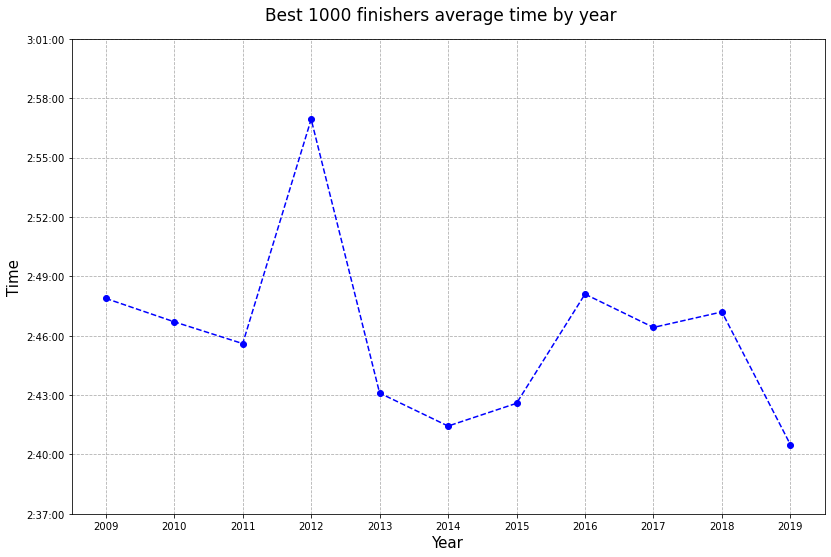

In [102]:
mean_times_best1000 = {year : get_mean_official_time(results.head(1000)) for year, results in results_by_year.items()}
fig, ax = prepare_basic_line_chart(mean_times_best1000, 'Best 1000 finishers average time by year', 'Year', 'Time')
plt.draw()
y_labels = [label.get_text() for label in ax.get_yticklabels()]
y_labels_range = np.arange(60*round(int(y_labels[0])/60), int(y_labels[-1]) + 180, 180)
ax.set_yticks(y_labels_range)
y_labels = [seconds_to_timestamp(label) for label in y_labels_range]
ax.set_yticklabels(y_labels)
plt.show()

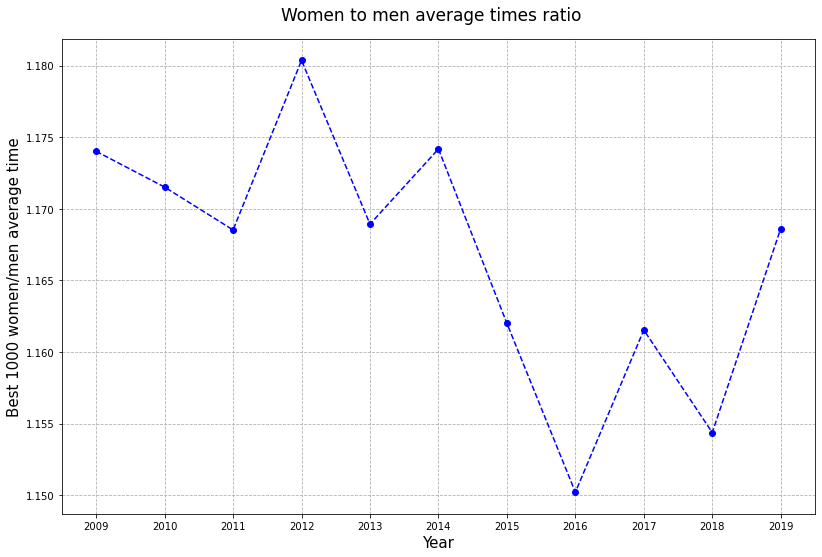

In [103]:
best_1000_men_by_year = {year : results[results['M/F']=='M'] for year, results in results_by_year.items()}
best_1000_women_by_year = {year : results[results['M/F']=='F'] for year, results in results_by_year.items()}
mean_times_men = {year : seconds_to_timestamp(get_mean_official_time(results.head(1000))) for year, results in best_1000_men_by_year.items()}
mean_times_women = {year : seconds_to_timestamp(get_mean_official_time(results.head(1000))) for year, results in best_1000_women_by_year.items()}
women_to_men_time = {year : timestamp_to_seconds(women_time)/timestamp_to_seconds(men_time) for ((year, women_time), men_time) in zip (mean_times_women.items(), mean_times_men.values())}
prepare_basic_line_chart(women_to_men_time, 'Women to men average times ratio', 'Year', 'Best 1000 women/men average time')
plt.show()

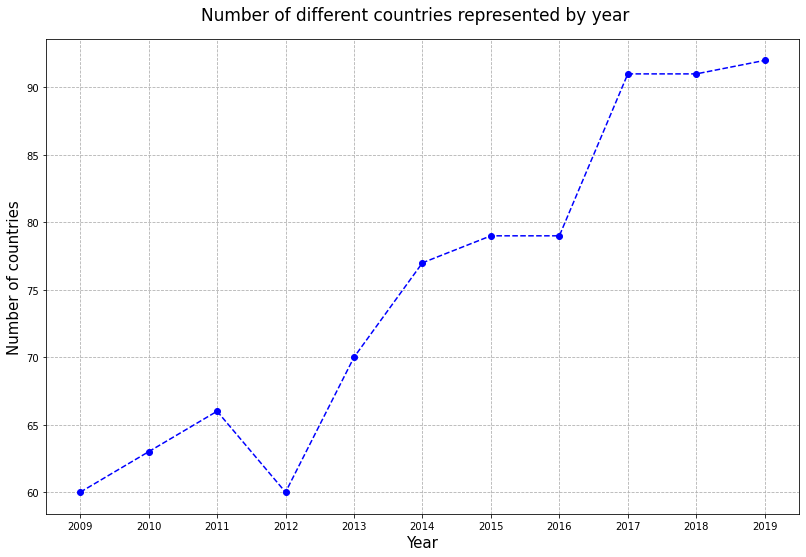

In [104]:
countries_represented_by_year = {year : results['Country'].nunique() for year, results in results_by_year.items()}
prepare_basic_line_chart(countries_represented_by_year, 'Number of different countries represented by year', 'Year', 'Number of countries')
plt.show()

In [219]:
for year, results in results_by_year.items():
    results['Year'] = np.full(shape=results.shape[0], fill_value=year)
all_results = pd.concat(results_by_year.values(), ignore_index=True)
all_results

,Bib,Name,Age,M/F,City,State,Country,5K,10K,15K,...,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
0,4,"Merga, Deriba",28,M,Addis Ababa,NaN,ETH,0:14:34,0:29:29,0:44:45,...,1:16:10,1:30:59,1:46:22,2:01:24,0:04:55,2:08:42,1,1,1,2009
1,5,"Rono, Daniel",30,M,Keiyo,NaN,KEN,0:14:34,0:29:30,0:44:46,...,1:16:10,1:31:00,1:46:51,2:02:28,0:04:57,2:09:32,2,2,2,2009
2,2,"Hall, Ryan",26,M,Mammoth Lakes,CA,USA,0:14:34,0:29:29,0:44:45,...,1:16:10,1:31:23,1:46:58,2:02:46,0:04:57,2:09:40,3,3,3,2009
3,19,"Kebede, Tekeste",27,M,Addis Ababa,NaN,ETH,0:14:34,0:29:29,0:44:46,...,1:16:10,1:31:23,1:46:58,2:02:46,0:04:57,2:09:49,4,4,4,2009
4,7,"Cheruiyot, Robert",20,M,Bomet,NaN,KEN,0:14:34,0:29:29,0:44:45,...,1:16:10,1:31:26,1:47:23,2:03:11,0:04:58,2:10:06,5,5,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272674,23909,"Mcninch, Brett",42,M,New Lebanon,OH,USA,0:27:04,0:55:14,1:30:44,...,3:07:53,4:29:32,5:48:38,6:49:34,0:16:34,7:14:12,26653,14672,1989,2019
272675,23949,"Oconell, Justin",28,M,Franklin,MA,USA,0:50:12,1:37:16,2:26:49,...,4:09:24,5:00:59,5:55:16,-,0:16:39,7:16:19,26654,14673,5092,2019
272676,15946,"Young, John",53,M,Salem,MA,USA,0:39:21,1:24:43,2:12:26,...,4:06:20,5:03:30,6:01:14,-,0:16:42,7:17:35,26655,14674,1858,2019
272677,23937,"Smith, Denise",51,F,Fort Collins,CO,USA,0:39:09,1:22:06,2:11:38,...,4:06:00,5:04:48,6:06:03,-,0:17:01,7:25:39,26656,11982,1200,2019


In [230]:
def prepare_basic_bar_chart(data, title, xlabel, ylabel, dark_color_high_value):
    fig, ax = plt.subplots()
    fig.set_size_inches(18,8)
    fig.suptitle(title, fontsize=17)
    ax.set_axisbelow(True)
    plt.grid(linestyle='-', axis='y', color='#dddddd')
    blues = plt.get_cmap('Blues')
    min_value = min(data.values())
    max_value = max(data.values())
    for key, value in data.items():
        color_index = (value - min_value) / (max_value - min_value) * 0.6 - 0.3
        if not dark_color_high_value:
            color_index = -color_index
        ax.bar(key, value, color = blues(0.7 + color_index))
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    ax.set_xticks(list(data.keys()))
    ax.set_xticklabels(list(data.keys()))
    fig.tight_layout(pad=4)
    return fig, ax

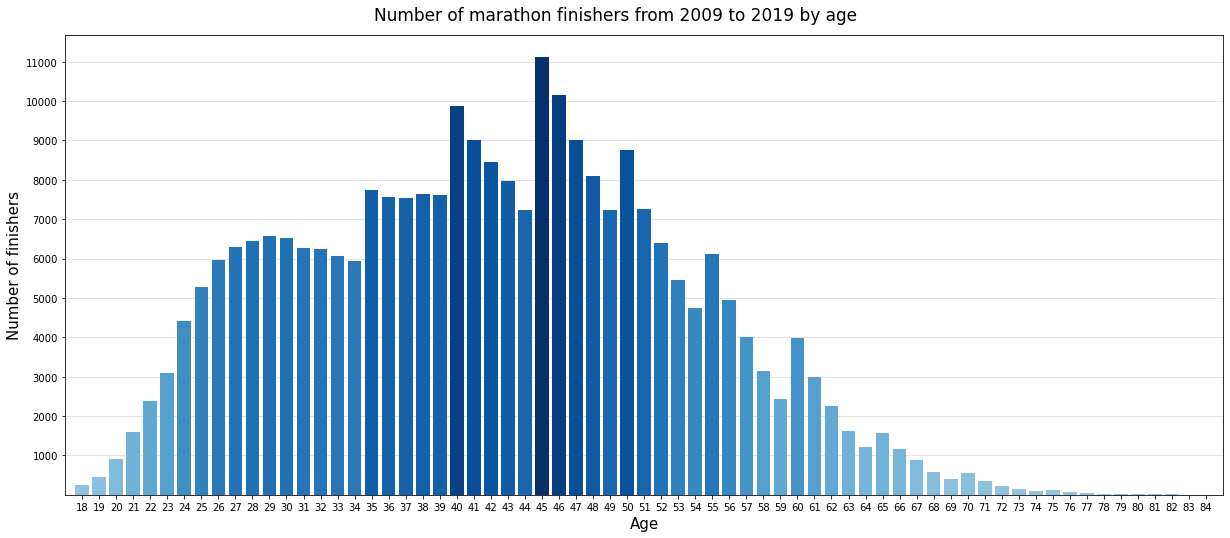

In [231]:
age_participants = all_results.groupby('Age').size()
fig, ax = prepare_basic_bar_chart(age_participants.to_dict(), 'Number of marathon finishers from 2009 to 2019 by age', 'Age', 'Number of finishers', True)
yticks = np.arange(1000, 11001, 1000)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
plt.xlim(age_participants.head(1).index[0] - 1, age_participants.tail(1).index[0] + 1)
plt.show()

In [232]:
all_results_seconds = all_results.copy(deep=True)
all_results_seconds['Official Time'] = all_results_seconds['Official Time'].apply(timestamp_to_seconds)

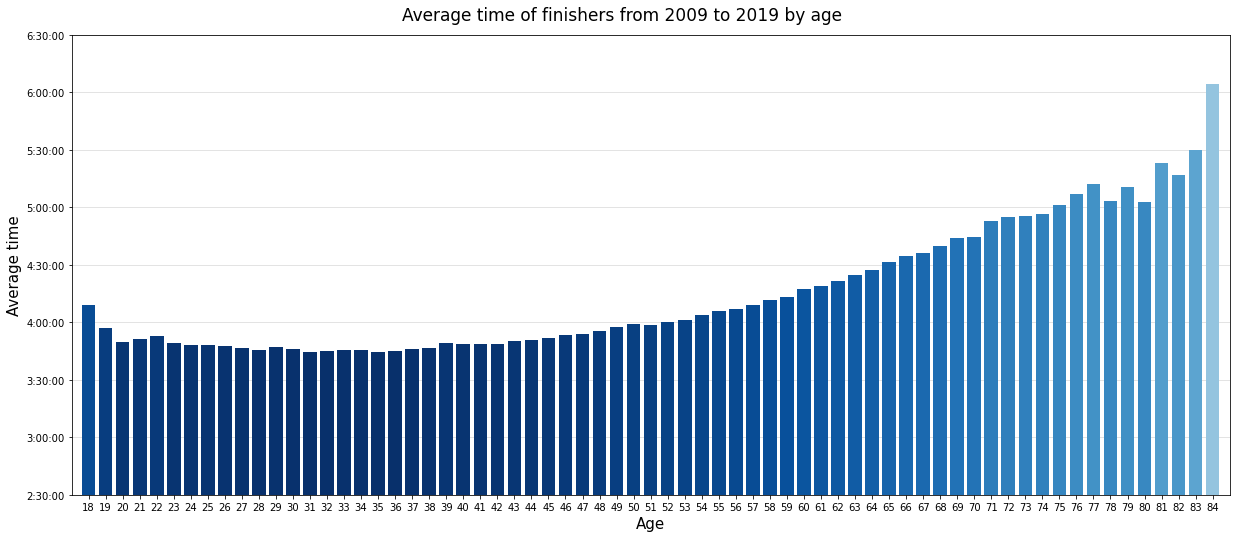

In [233]:
age_mean_times = all_results_seconds.groupby('Age')['Official Time'].mean().to_dict()
fig, ax = prepare_basic_bar_chart(age_mean_times, 'Average time of finishers from 2009 to 2019 by age', 'Age', 'Average time', False)
plt.draw()
y_labels = [label.get_text() for label in ax.get_yticklabels()]
ax.set_ylim(bottom=9000)
y_labels_range = np.arange(9000, int(y_labels[-1]), 1800)
ax.set_yticks(y_labels_range)
y_labels = [seconds_to_timestamp(label) for label in y_labels_range]
ax.set_yticklabels(y_labels)
plt.xlim(age_participants.head(1).index[0] - 1, age_participants.tail(1).index[0] + 1)
plt.show()

In [177]:
countries_participants = all_results.groupby('Country').size().sort_values(ascending=False)
countries_participants.head(30)

Country
USA    222774
CAN     21599
GBR      3450
MEX      2257
GER      1893
ITA      1691
JPN      1571
AUS      1349
BRA      1287
CHN      1284
FRA      1160
ESP       975
KOR       949
IRL       860
HKG       717
SUI       649
NED       618
DEN       555
SWE       531
COL       467
CHI       408
TWN       354
BEL       351
CRC       304
NOR       249
POL       246
AUT       231
NZL       225
SIN       220
ARG       218
dtype: int64

In [104]:
weather = pd.read_csv('data/weather.csv')
weather

,Year,Temperature(°F),Sky,Humidity(%)
0,2019,58,overcast,87
1,2018,43,heavy rain,89
2,2017,72,clear,37
3,2016,67,clear,28
4,2015,41,light rain,93
5,2014,50,clear,24
6,2013,48,mostly cloudy,48
7,2012,76,clear,46
8,2011,44,partly cloudy,43
9,2010,47,partly cloudy,50


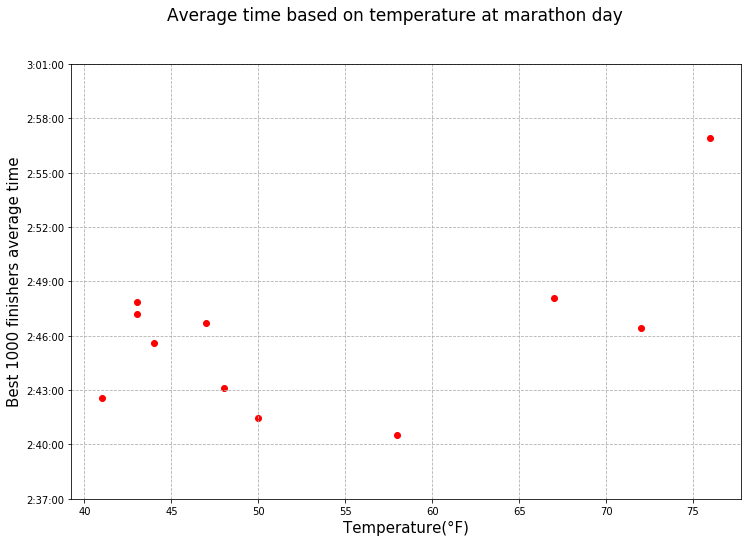

In [105]:
temperatures = weather[['Year', 'Temperature(°F)']]
times = pd.DataFrame(mean_times_best1000, index = ['Average time']).transpose()
times_and_weather = pd.DataFrame(weather.iloc[::-1])
times_and_weather['Average time'] = times['Average time'].to_list()
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
fig.suptitle('Average time based on temperature at marathon day', fontsize=17)
ax.scatter(times_and_weather['Temperature(°F)'].to_list(), times_and_weather['Average time'].to_list(), color='r')
ax.set_xlabel('Temperature(°F)', fontsize=15)
ax.set_ylabel('Best 1000 finishers average time', fontsize=15)
plt.draw()
y_labels = [label.get_text() for label in ax.get_yticklabels()]
y_labels_range = np.arange(60*round(int(y_labels[0])/60), int(y_labels[-1]) + 180, 180)
ax.set_yticks(y_labels_range)
y_labels = [seconds_to_timestamp(label) for label in y_labels_range]
ax.set_yticklabels(y_labels)
plt.grid(linestyle='--')
plt.show()

In [106]:
sky_conditions_rates = {'clear' : 5, 'partly cloudy' : 4, 'mostly cloudy' : 3, 'overcast' : 2, 'light rain' : 1, 'heavy rain' : 0}
def get_sky_conditions_rates(conditions):
    return sky_conditions_rates[conditions]
print(pd.DataFrame(times_and_weather['Average time']).corrwith(times_and_weather['Temperature(°F)']))
print(pd.DataFrame(times_and_weather['Average time']).corrwith(times_and_weather['Humidity(%)']))
print(pd.DataFrame(times_and_weather['Average time']).corrwith(times_and_weather['Sky'].apply(get_sky_conditions_rates)))

Average time    0.526547
dtype: float64
Average time   -0.212815
dtype: float64
Average time    0.373914
dtype: float64


In [109]:
states = pd.read_csv('data/states.csv')
states

,Postal abbreviation,State name,Avg temperature(°F),Avg elevation(m)
0,AK,Alaska,32.03,580
1,AL,Alabama,62.68,150
2,AR,Arkansas,60.09,200
3,AZ,Arizona,65.97,1250
4,CA,California,61.17,880
5,CO,Colorado,46.26,2070
6,CT,Connecticut,48.60,150
7,DE,Delaware,54.48,20
8,FL,Florida,71.80,30
9,GA,Georgia,62.30,180


In [110]:
usa_participants_by_year = {year : results[results['Country'] == 'USA'] for year, results in results_by_year.items()}
regions_represented_by_year = {year : participants.groupby('State').size() for year, participants in usa_participants_by_year.items()}
states_represented_by_year = {}
for year in range(2009, 2020):
    states_participants = {}
    for region, participants in regions_represented_by_year[year].items():
        if region in states['Postal abbreviation'].values:
            states_participants[region] = participants
    if states_participants:
        states_represented_by_year[year] = states_participants
states_represented_by_year

{2009: {'AK': 67,
  'AL': 69,
  'AR': 27,
  'AZ': 235,
  'CA': 1598,
  'CO': 431,
  'CT': 423,
  'DE': 64,
  'FL': 461,
  'GA': 297,
  'HI': 48,
  'IA': 134,
  'ID': 74,
  'IL': 649,
  'IN': 208,
  'KS': 129,
  'KY': 117,
  'LA': 51,
  'MA': 4719,
  'MD': 415,
  'ME': 160,
  'MI': 626,
  'MN': 367,
  'MO': 173,
  'MS': 24,
  'MT': 56,
  'NC': 340,
  'ND': 31,
  'NE': 80,
  'NH': 334,
  'NJ': 579,
  'NM': 59,
  'NV': 83,
  'NY': 1296,
  'OH': 677,
  'OK': 76,
  'OR': 246,
  'PA': 769,
  'RI': 148,
  'SC': 115,
  'SD': 18,
  'TN': 236,
  'TX': 763,
  'UT': 238,
  'VA': 579,
  'VT': 109,
  'WA': 395,
  'WI': 372,
  'WV': 42,
  'WY': 15},
 2010: {'AK': 58,
  'AL': 63,
  'AR': 39,
  'AZ': 182,
  'CA': 1496,
  'CO': 407,
  'CT': 368,
  'DE': 47,
  'FL': 504,
  'GA': 216,
  'HI': 33,
  'IA': 163,
  'ID': 76,
  'IL': 995,
  'IN': 238,
  'KS': 137,
  'KY': 114,
  'LA': 33,
  'MA': 4612,
  'MD': 429,
  'ME': 169,
  'MI': 641,
  'MN': 442,
  'MO': 188,
  'MS': 29,
  'MT': 52,
  'NC': 374,
  'ND':

,Bib,Name,Age,M/F,City,State,Country,5K,10K,15K,...,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division
0,4,"Merga, Deriba",28,M,Addis Ababa,NaN,ETH,0:14:34,0:29:29,0:44:45,...,1:03:39,1:16:10,1:30:59,1:46:22,2:01:24,0:04:55,2:08:42,1,1,1
1,5,"Rono, Daniel",30,M,Keiyo,NaN,KEN,0:14:34,0:29:30,0:44:46,...,1:03:40,1:16:10,1:31:00,1:46:51,2:02:28,0:04:57,2:09:32,2,2,2
2,2,"Hall, Ryan",26,M,Mammoth Lakes,CA,USA,0:14:34,0:29:29,0:44:45,...,1:03:40,1:16:10,1:31:23,1:46:58,2:02:46,0:04:57,2:09:40,3,3,3
3,19,"Kebede, Tekeste",27,M,Addis Ababa,NaN,ETH,0:14:34,0:29:29,0:44:46,...,1:03:40,1:16:10,1:31:23,1:46:58,2:02:46,0:04:57,2:09:49,4,4,4
4,7,"Cheruiyot, Robert",20,M,Bomet,NaN,KEN,0:14:34,0:29:29,0:44:45,...,1:03:39,1:16:10,1:31:26,1:47:23,2:03:11,0:04:58,2:10:06,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272674,23909,"Mcninch, Brett",42,M,New Lebanon,OH,USA,0:27:04,0:55:14,1:30:44,...,2:17:35,3:07:53,4:29:32,5:48:38,6:49:34,0:16:34,7:14:12,26653,14672,1989
272675,23949,"Oconell, Justin",28,M,Franklin,MA,USA,0:50:12,1:37:16,2:26:49,...,3:27:50,4:09:24,5:00:59,5:55:16,-,0:16:39,7:16:19,26654,14673,5092
272676,15946,"Young, John",53,M,Salem,MA,USA,0:39:21,1:24:43,2:12:26,...,3:21:04,4:06:20,5:03:30,6:01:14,-,0:16:42,7:17:35,26655,14674,1858
272677,23937,"Smith, Denise",51,F,Fort Collins,CO,USA,0:39:09,1:22:06,2:11:38,...,3:20:47,4:06:00,5:04:48,6:06:03,-,0:17:01,7:25:39,26656,11982,1200


Country
USA    222774
CAN     21599
GBR      3450
MEX      2257
GER      1893
ITA      1691
JPN      1571
AUS      1349
BRA      1287
CHN      1284
dtype: int64